In [142]:
# https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/ - to import csv file
# blog as reference - https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70

from google.colab import files
uploaded = files.upload()


Saving AAPL.csv to AAPL (1).csv


In [82]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import io
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [143]:
df = pd.read_csv(io.BytesIO(uploaded['AAPL.csv']))
# print(df)
# df.head(100)

           Date        Open        High  ...       Close   Adj Close     Volume
0    2021-08-24  149.449997  150.860001  ...  149.619995  149.401947   48606400
1    2021-08-25  149.809998  150.320007  ...  148.360001  148.143784   58991300
2    2021-08-26  148.350006  149.119995  ...  147.539993  147.324982   48597200
3    2021-08-27  147.479996  148.750000  ...  148.600006  148.383453   55721500
4    2021-08-30  149.000000  153.490005  ...  153.119995  152.896851   90956700
..          ...         ...         ...  ...         ...         ...        ...
102  2022-01-19  170.000000  171.080002  ...  166.229996  166.229996   94815000
103  2022-01-20  166.979996  169.679993  ...  164.509995  164.509995   91420500
104  2022-01-21  164.419998  166.330002  ...  162.410004  162.410004  122501300
105  2022-01-24  160.020004  162.300003  ...  161.619995  161.619995  162706700
106  2022-01-25  158.979996  162.759995  ...  159.779999  159.779999  114972000

[107 rows x 7 columns]


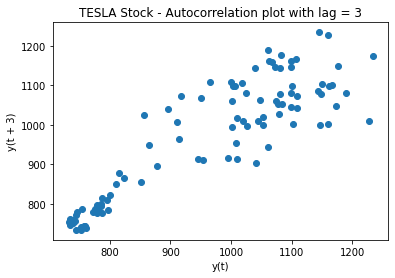

In [19]:
#code to check auto correlation
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('APPLE-US Stock - Autocorrelation plot with lag = 3')
plt.show()
#(There is auto-correlation in the data).
#We can now confirm that ARIMA is going to be a good model to be applied to this type of data

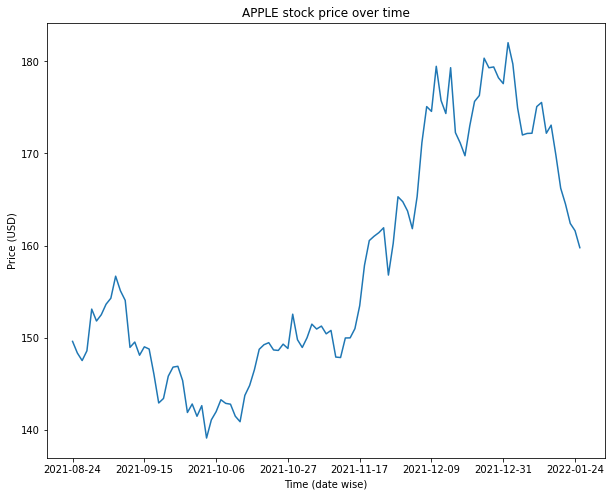

In [152]:
#blog for xticks = https://www.geeksforgeeks.org/matplotlib-pyplot-xticks-in-python/
#blog for np.arrange = https://realpython.com/how-to-use-numpy-arange/
#es perfectose... figsize not above the plt.plot() was causing the issue.
plt.figure(figsize = (10,8))
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,108, 15), df['Date'][0:108:15])
plt.title("APPLE stock price over time")
plt.xlabel("Time (date wise)")
plt.ylabel("Price (USD)")

plt.show()


In [151]:
# For this we select the following ARIMA parameters: p=4, d=1 and q=0.
#training 100 rows, test 5 rows
data_train, data_test = df[0:100], df[100:108]
training_data = data_train['Close'].values
data_test = data_test['Close'].values
history = [x for x in training_data]
model_predictions = []
N_observations_test = len(data_test)
for time_point in range(N_observations_test):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = data_test[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(data_test, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))




Testing Mean Squared Error is 6.5462675862673345


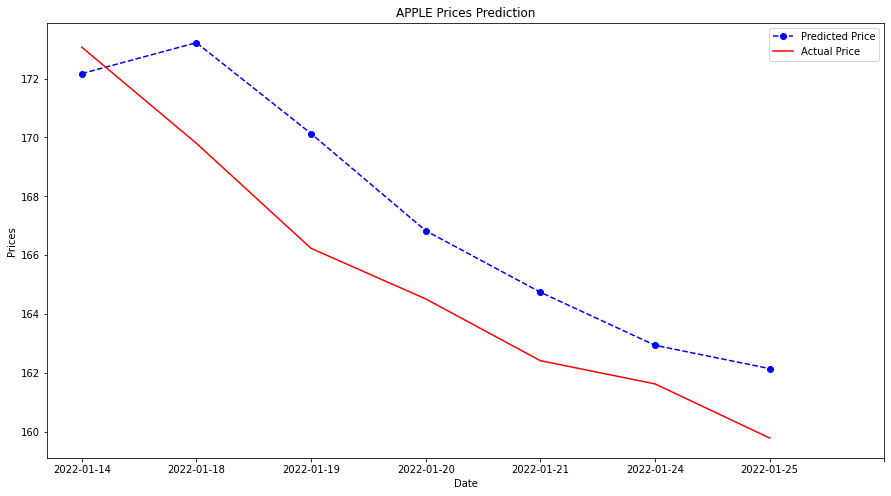

In [154]:

# Let’s visualize the predictions to understand the performance of the model more.

test_set_range = df[100:108].index
plt.figure(figsize = (15,8))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, data_test, color='red', label='Actual Price')
plt.title('APPLE Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(100,108,1), df.Date[100:108:1])
plt.legend()
plt.show()